### Описание
Практика разведочного анализа (EDA) датасета о смартфонах (датасет индийский, но представим, что цены в рублях)

Ссылка на датасет: [Kaggle](https://www.kaggle.com/datasets/chaudharisanika/smartphones-dataset)

In [1]:
# Загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета в датафрейм
df = pd.read_csv('./dataset/Smartphones_cleaned_dataset.csv')

df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [2]:
# Информация по типам данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [3]:
# Проверяем размер датасета
df.shape

# В датасете 980 строк и 26 столбцов

(980, 26)

In [4]:
# Проверяем названия столбцов
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [5]:
# Краткая сводка по статистическим данным в столбцах
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


In [6]:
# Проверяем наличие пустых значений в столбцах
df.isnull().sum()

# В некоторых столбцах есть пропуски, но автор датасета пишет, что всё уже почищено. 
# Замена некоторых значений на 0, например в столбце rating, может исказить результаты анализа.

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [7]:
# Проверяем кол-во уникальных значений в столбцах
df.nunique()

brand_name                    46
model                        980
price                        379
rating                        30
has_5g                         2
has_nfc                        2
has_ir_blaster                 2
processor_brand               13
num_cores                      3
processor_speed               35
battery_capacity              89
fast_charging_available        2
fast_charging                 32
ram_capacity                   9
internal_memory                8
screen_size                   79
refresh_rate                   6
num_rear_cameras               4
num_front_cameras              2
os                             3
primary_camera_rear           18
primary_camera_front          24
extended_memory_available      2
extended_upto                  7
resolution_width              40
resolution_height             65
dtype: int64

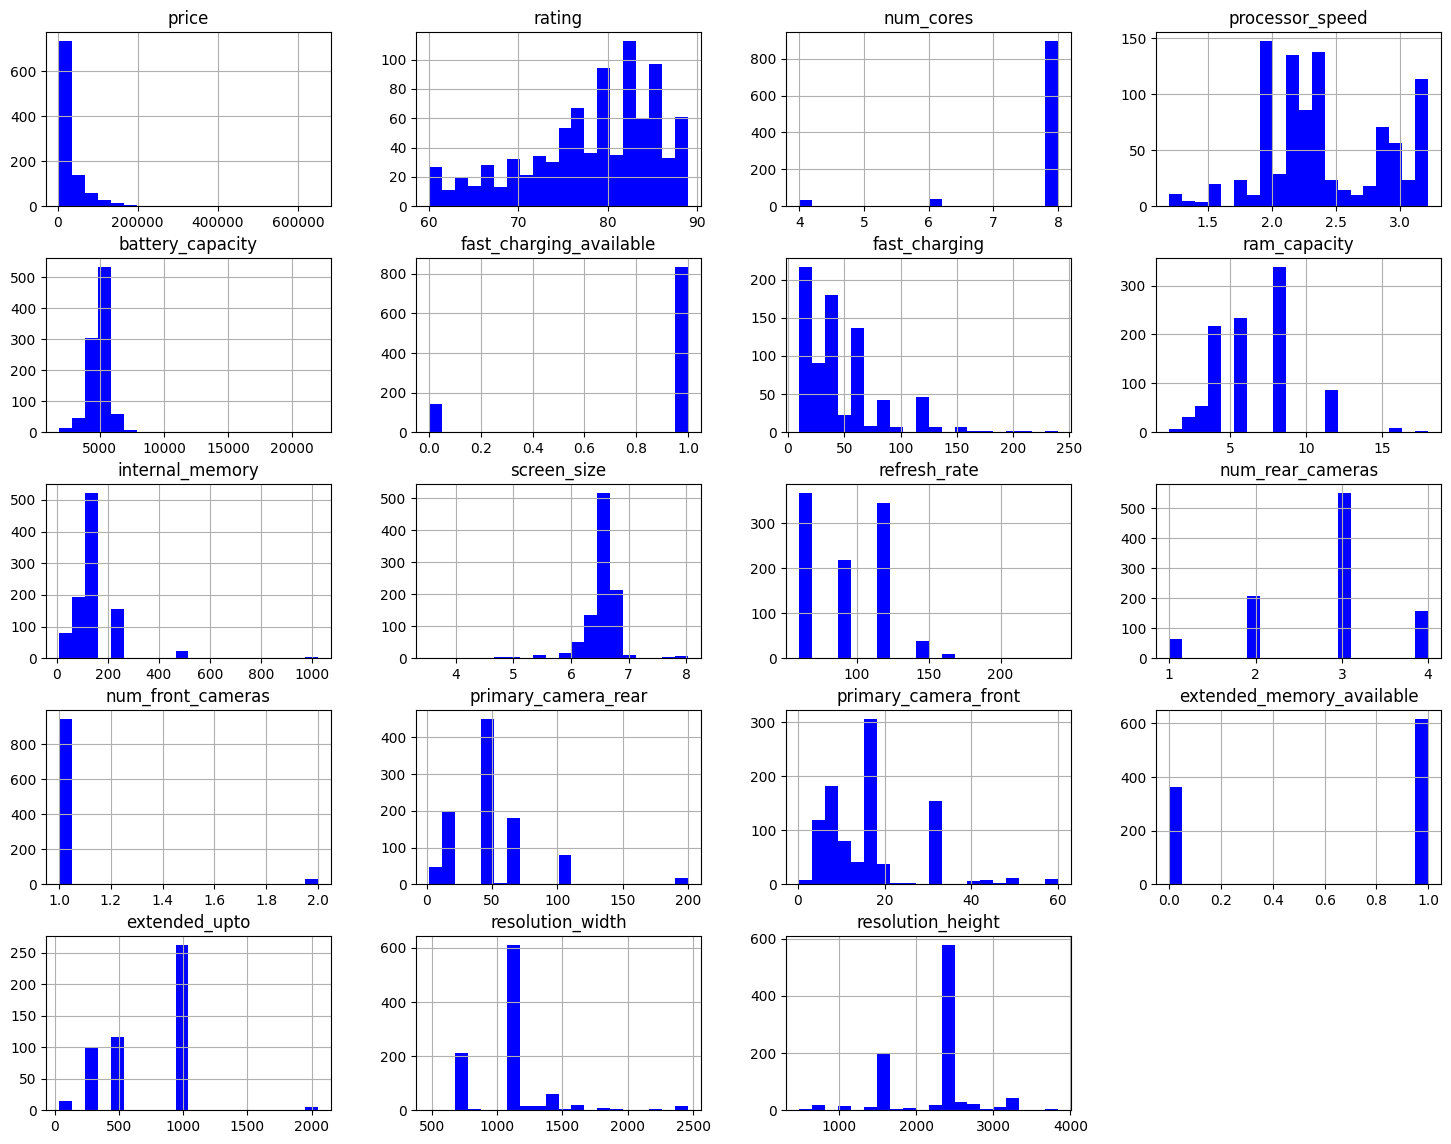

In [8]:
# Строим гистограммы распределения по всем столбцам
df.hist(bins=20, figsize=(18, 14), color='blue')
plt.show()

<Axes: >

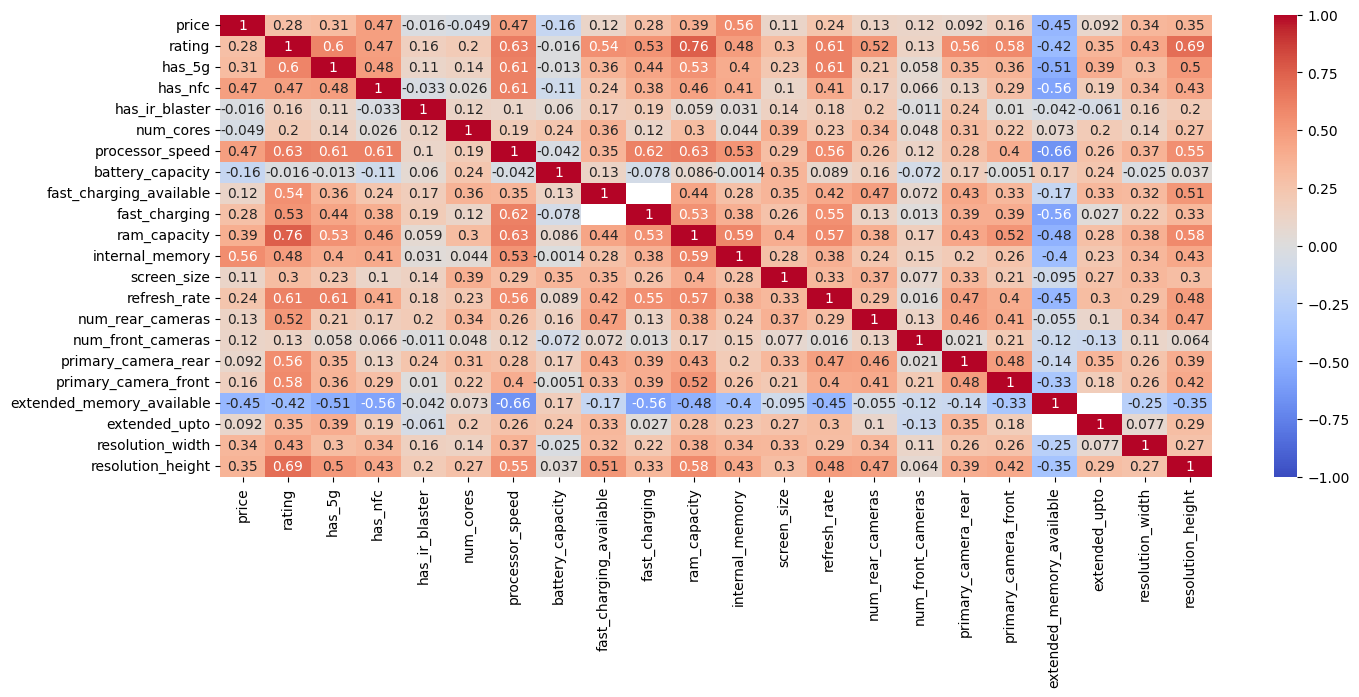

In [9]:
# Строим хитмап (тепловую карту) по столбцам для проверки корреляции
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, annot=True, cmap="coolwarm")

# При беглом рассмотрении можно заметить, что рейтинг смартфона слабо коррелирует от цены (коэффициент всего лишь 0,28)
# Зато есть положительная корреляция (0,6 или выше) со следующими характеристиками телефона:
# наличие 5G (has_5g), частота процессора (processor_speed), объём ОЗУ (ram_capacity), частота обновления экрана (refresh_rate), вертикальное разрешение экрана (resolution_height)

In [20]:
# Сгруппируем смартфоны по производителям (бренду) и определим 5 самых популярных по рейтингу (не будем учитывать бренды без рейтинга)
gr = df.groupby(['brand_name'])['rating'].mean().dropna().sort_values(ascending=False).head(5)
gr

brand_name
leitz     89.0
lenovo    88.0
sharp     88.0
asus      87.0
lg        87.0
Name: rating, dtype: float64